In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

In [ ]:
df_path = "/content/drive/MyDrive/Kecerdasan Buatan/Praktikum/Dataset/diabetes.csv"
df = pd.read_csv(df_path)

In [ ]:
print('data teratas: ')
print(df.head(10))
print('data terbawah: ')
print(df.tail(10))

data teratas: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3               

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
df.shape

(768, 9)

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

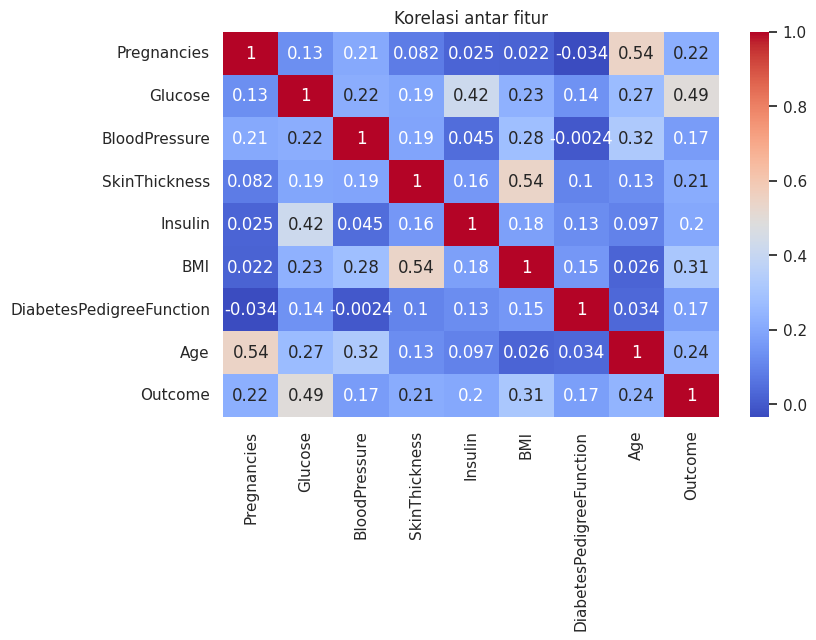

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur")
plt.show()

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# === STEP 7: SMOTE hanya ke train set ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_res))

Distribusi sebelum SMOTE: Counter({0: 400, 1: 214})
Distribusi setelah SMOTE: Counter({0: 400, 1: 400})


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {"Random Forest": RandomForestClassifier()}


=== Random Forest ===


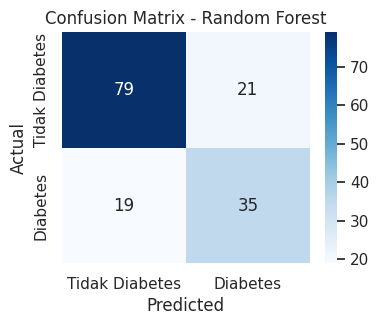

Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.62      0.65      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [ ]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Diabetes", "Diabetes"], yticklabels=["Tidak Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

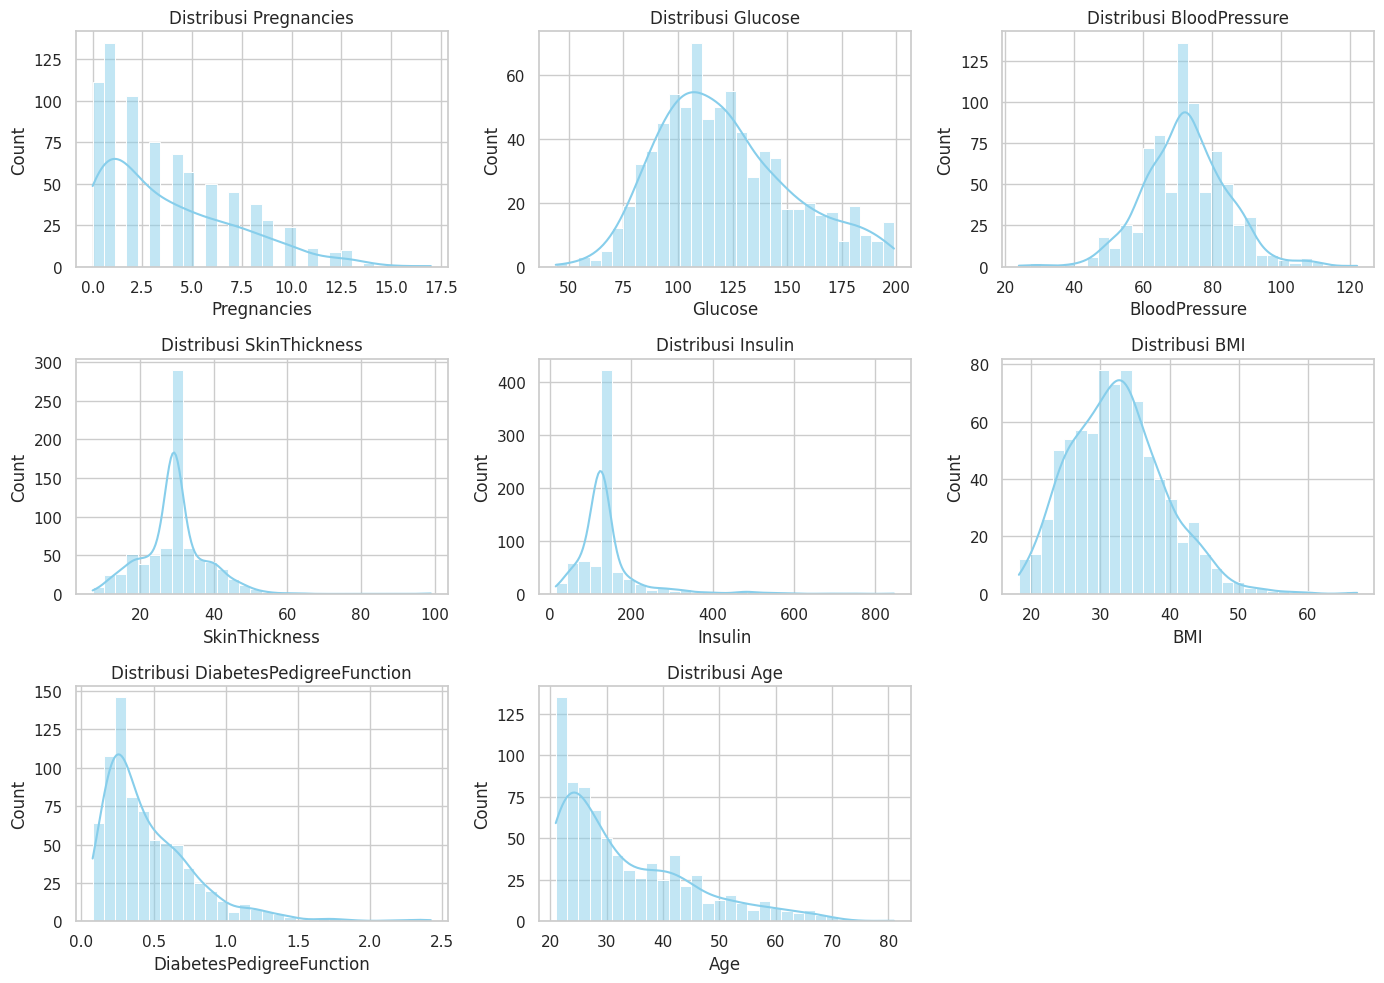

/tmp/ipython-input-43-904134871.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


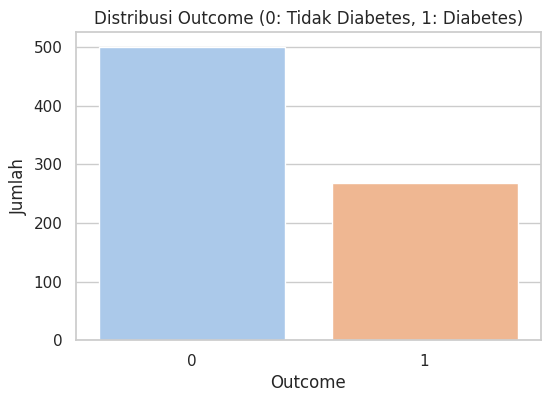

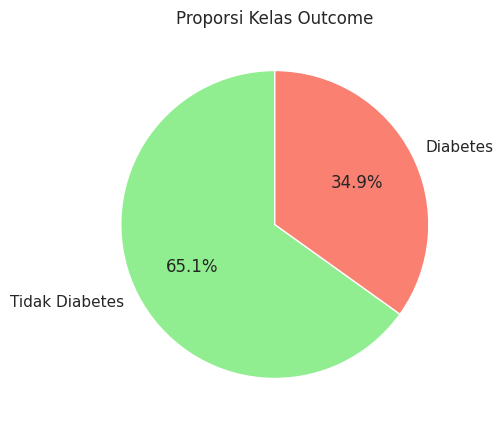

In [ ]:
sns.set(style="whitegrid")

# Histogram semua fitur numerik (kecuali Outcome)
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Bar Chart untuk kelas Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title('Distribusi Outcome (0: Tidak Diabetes, 1: Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

# Pie Chart untuk proporsi Outcome
plt.figure(figsize=(5, 5))
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Tidak Diabetes', 'Diabetes'],
                                      colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proporsi Kelas Outcome')
plt.ylabel('')
plt.show()